In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/MOVIE RATING PREDICTION WITH PYTHON/IMDb Movies India.csv", encoding='latin')

In [ ]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
df.isnull().any()

Name        False
Year         True
Duration     True
Genre        True
Rating       True
Votes        True
Director     True
Actor 1      True
Actor 2      True
Actor 3      True
dtype: bool

In [ ]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [ ]:
df.duplicated().sum()

6

In [ ]:
df.shape

(15509, 10)

In [ ]:
df['Director'].value_counts()

Director
Jayant Desai        58
Kanti Shah          57
Babubhai Mistry     50
Mahesh Bhatt        48
Master Bhagwan      47
                    ..
Naeem Siddiqui       1
Shadaab Khan         1
Mystelle Brabbee     1
Kunal Shivdasani     1
Kiran Thej           1
Name: count, Length: 5938, dtype: int64

In [ ]:
nulls = df[df.iloc[:, 1:9].isna().all(axis=1)]
nulls.shape

(8, 10)

In [ ]:
df = df[~df.iloc[: , 1:9].isna().apply(lambda x: all(x), axis=1)]

In [ ]:
df.drop_duplicates(subset=['Name', 'Year'], inplace=True)
df.shape

<ipython-input-1369-15a07e206a7d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(15477, 10)

In [ ]:
null_rows = df[df.iloc[: , [1,2,4,5,6]].isna().apply(lambda x: all(x), axis=1)]
print("Below are the Missing values for each column from 1 to 5 excluding Genre:")
null_rows.shape

Below are the Missing values for each column from 1 to 5 excluding Genre:


(19, 10)

In [ ]:
df = df[~df.iloc[: , [1,2,4,5,6]].isna().apply(lambda x: all(x), axis=1)]
df.shape

(15458, 10)

In [ ]:
df['Duration'] = pd.to_numeric(df['Duration'].str.replace(r' min', '', regex=True), errors='coerce')

<ipython-input-1372-760f43943f7e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df['Year'] = df['Year'].astype(str)
df['Year'] = df['Year'].str.replace(r'[()]', '', regex=True)
df['Year'] = df['Year'].astype(float)
print(df['Year'].min())
print(df['Year'].max())

1913.0
2022.0


<ipython-input-1373-74ed4e30e914>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-1373-74ed4e30e914>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.loc[(df['Year'] < 1913) | (df['Year'] > 2023), 'Year'] = (1913 + 2022) / 2
print(df['Year'].unique())

[  nan 2019. 2021. 2010. 1997. 2005. 2008. 2012. 2014. 2004. 2016. 1991.
 1990. 2018. 1987. 1948. 1958. 2017. 2020. 2009. 2002. 1993. 1946. 1994.
 2007. 2013. 2003. 1998. 1979. 1951. 1956. 1974. 2015. 2006. 1981. 1985.
 2011. 2001. 1967. 1988. 1995. 1959. 1996. 1970. 1976. 2000. 1999. 1973.
 1968. 1943. 1953. 1986. 1983. 1989. 1982. 1977. 1957. 1950. 1992. 1969.
 1975. 1947. 1972. 1971. 1935. 1978. 1960. 1944. 1963. 1940. 1984. 1934.
 1955. 1936. 1980. 1966. 1949. 1962. 1964. 1952. 1933. 1942. 1939. 1954.
 1945. 1961. 1965. 1938. 1941. 1931. 1937. 2022. 1932. 1923. 1915. 1928.
 1922. 1917. 1913. 1930. 1926. 1914. 1924.]


In [ ]:
df['Name'] = df['Name'].astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15458 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15458 non-null  object 
 1   Year      14958 non-null  float64
 2   Duration  7235 non-null   float64
 3   Genre     13595 non-null  object 
 4   Rating    7915 non-null   float64
 5   Votes     7916 non-null   object 
 6   Director  14962 non-null  object 
 7   Actor 1   13875 non-null  object 
 8   Actor 2   13110 non-null  object 
 9   Actor 3   12355 non-null  object 
dtypes: float64(3), object(7)
memory usage: 1.3+ MB


In [ ]:
df['Votes'] = df['Votes'].str.replace(',', '').str.replace('$', '').str.replace('M','').str.replace('.', '')
df['Votes'] = df['Votes'].astype(float)

In [ ]:
genres_list = df["Genre"].str.split(", ").explode()
unique_genres = genres_list.unique()
print(unique_genres)

['Drama' 'Musical' 'Comedy' 'Romance' 'War' 'Documentary' 'Horror'
 'Mystery' 'Thriller' 'Action' 'Crime' nan 'Fantasy' 'Family' 'Biography'
 'History' 'Sport' 'Adventure' 'Sci-Fi' 'Music' 'Animation' 'News'
 'Western' 'Reality-TV' 'Short']


In [ ]:
for genre in unique_genres:
    df[genre] = 0
for index, row in df.iterrows():
  if type(row['Genre']) != float:
    genres = row["Genre"].split(", ")
    for genre in genres:
        df.at[index, genre] = 1

In [ ]:
df['Year'].fillna('0', inplace=True)
df['Year'] = df['Year'].astype(int)

In [ ]:
df['Genre'].fillna(df['Genre'].mode()[0], inplace=True)

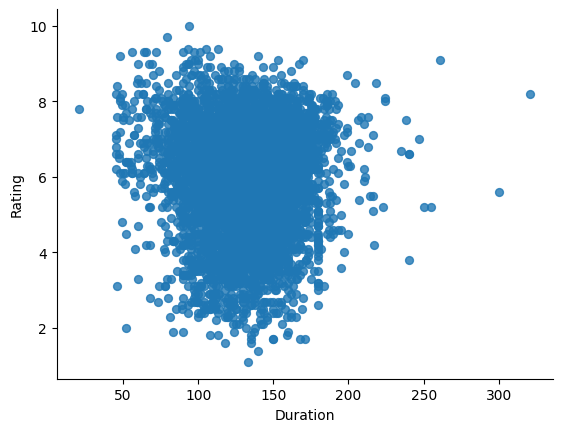

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Duration', y='Rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

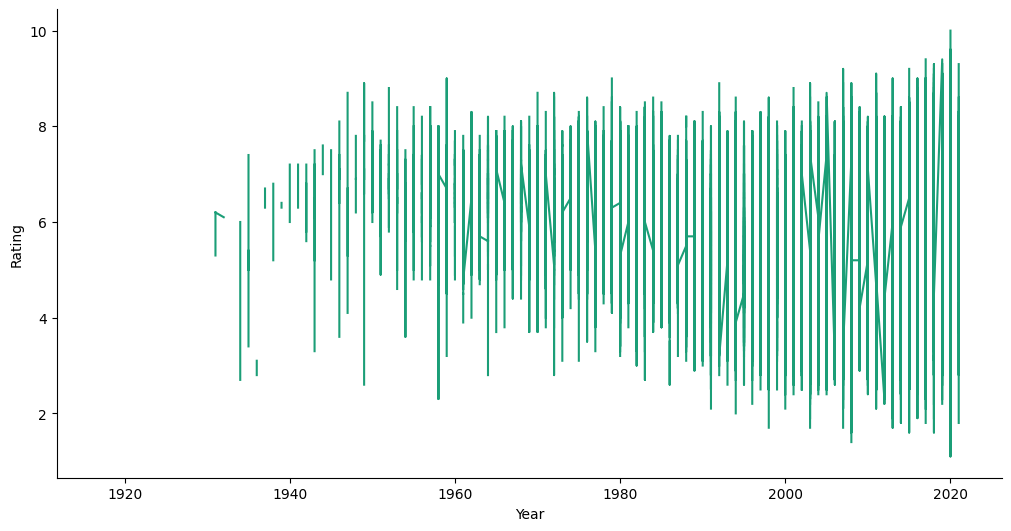

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Rating']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Rating')

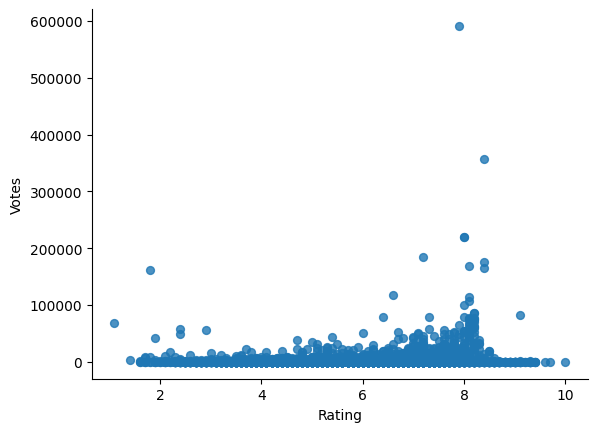

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Rating', y='Votes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
year_count=df.groupby('Year').apply(lambda x:x['Name'].count()).reset_index(name='Count')
fig = px.bar(year_count, y='Count', x='Year', text='Count',title='Number of movie by year of launch')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_mode='show', xaxis = dict (title = 'Year of Movie Release', titlefont_size=16), yaxis=dict(title='Count of Movies Released', titlefont_size=16,tickfont_size=14))
fig.show()

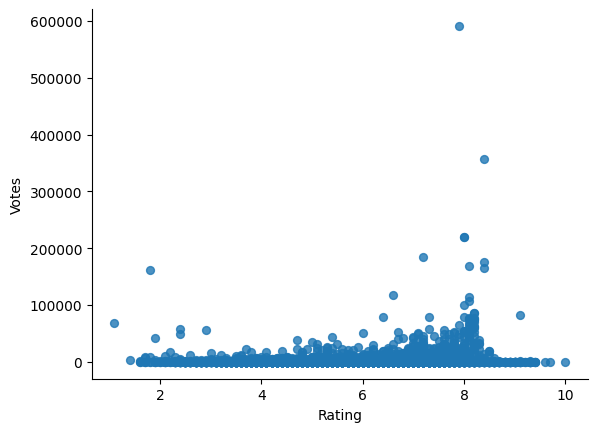

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Rating', y='Votes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
Director_Year = df[['Director','Year']].dropna()
Director_Year['Count'] = 1
Director_Top = Director_Year['Director'].value_counts().rename_axis('Director').reset_index(name='Count')
fig = px.bar(Director_Top[0:20],
             x='Director',
             y='Count',
             title = 'Top 20 Director by number of Movies made')
fig.show()

In [ ]:
df = df.dropna(axis=1, how='all')
df['Rating'].fillna(df['Rating'].mode().max(),inplace=True)

df['Duration'].fillna(df['Duration'].mean(),inplace=True)

df['Votes'].fillna(df['Votes'].mean(),inplace=True)
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,...,History,Sport,Adventure,Sci-Fi,Music,Animation,News,Western,Reality-TV,Short
0,,0,128.128956,Drama,6.2,1939.31051,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,...,0,0,0,0,0,0,0,0,0,0
1,#Gadhvi (He thought he was Gandhi),2019,109.000000,Drama,7.0,8.00000,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,...,0,0,0,0,0,0,0,0,0,0
2,#Homecoming,2021,90.000000,"Drama, Musical",6.2,1939.31051,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,...,0,0,0,0,0,0,0,0,0,0
3,#Yaaram,2019,110.000000,"Comedy, Romance",4.4,35.00000,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,...,0,0,0,0,0,0,0,0,0,0
4,...And Once Again,2010,105.000000,Drama,6.2,1939.31051,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,1988,128.128956,Action,4.6,11.00000,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,...,0,0,0,0,0,0,0,0,0,0
15505,Zulmi,1999,129.000000,"Action, Drama",4.5,655.00000,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,...,0,0,0,0,0,0,0,0,0,0
15506,Zulmi Raj,2005,128.128956,Action,6.2,1939.31051,Kiran Thej,Sangeeta Tiwari,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
15507,Zulmi Shikari,1988,128.128956,Action,6.2,1939.31051,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15458 entries, 0 to 15508
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         15458 non-null  object 
 1   Year         15458 non-null  int64  
 2   Duration     15458 non-null  float64
 3   Genre        15458 non-null  object 
 4   Rating       15458 non-null  float64
 5   Votes        15458 non-null  float64
 6   Director     14962 non-null  object 
 7   Actor 1      13875 non-null  object 
 8   Actor 2      13110 non-null  object 
 9   Actor 3      12355 non-null  object 
 10  Drama        15458 non-null  int64  
 11  Musical      15458 non-null  int64  
 12  Comedy       15458 non-null  int64  
 13  Romance      15458 non-null  int64  
 14  War          15458 non-null  int64  
 15  Documentary  15458 non-null  int64  
 16  Horror       15458 non-null  int64  
 17  Mystery      15458 non-null  int64  
 18  Thriller     15458 non-null  int64  
 19  Action   

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer

genre_mean_rating = df.groupby('Genre')['Rating'].transform('mean')
df['Genre_mean_rating'] = genre_mean_rating

director_mean_rating = df.groupby('Director')['Rating'].transform('mean')
df['Director_encoded'] = director_mean_rating

actor1_mean_rating = df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor1_encoded'] = actor1_mean_rating

actor2_mean_rating = df.groupby('Actor 2')['Rating'].transform('mean')
df['Actor2_encoded'] = actor2_mean_rating

actor3_mean_rating = df.groupby('Actor 3')['Rating'].transform('mean')
df['Actor3_encoded'] = actor3_mean_rating

df

<ipython-input-1392-ce318f881a19>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-1392-ce318f881a19>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-1392-ce318f881a19>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-13

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,...,Animation,News,Western,Reality-TV,Short,Genre_mean_rating,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
0,,0,128.128956,Drama,6.2,1939.31051,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,...,0,0,0,0,0,6.254312,5.950000,6.200000,5.728571,6.200000
1,#Gadhvi (He thought he was Gandhi),2019,109.000000,Drama,7.0,8.00000,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,...,0,0,0,0,0,6.254312,7.000000,6.850000,7.000000,7.000000
2,#Homecoming,2021,90.000000,"Drama, Musical",6.2,1939.31051,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,...,0,0,0,0,0,6.480556,6.200000,6.600000,6.966667,6.200000
3,#Yaaram,2019,110.000000,"Comedy, Romance",4.4,35.00000,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,...,0,0,0,0,0,5.759259,4.400000,5.420000,4.400000,4.450000
4,...And Once Again,2010,105.000000,Drama,6.2,1939.31051,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,...,0,0,0,0,0,6.254312,6.314286,6.866667,5.844444,5.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15502,Zulm Ki Pukar,1979,128.128956,Action,6.2,1939.31051,Dinesh-Ramanesh,Ramesh Puri,Jalal Agha,Valerie Agha,...,0,0,0,0,0,5.750846,6.125000,6.220000,6.233333,6.200000
15503,Zulm Ki Zanjeer,1989,125.000000,"Action, Crime, Drama",5.8,44.00000,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,...,0,0,0,0,0,5.660927,5.885714,6.266667,6.066667,5.945455
15504,Zulm Ko Jala Doonga,1988,128.128956,Action,4.6,11.00000,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,...,0,0,0,0,0,5.750846,4.075000,6.029167,3.700000,4.600000
15505,Zulmi,1999,129.000000,"Action, Drama",4.5,655.00000,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,...,0,0,0,0,0,5.554045,5.225000,5.522989,4.645455,5.765957


In [ ]:
df = df.dropna(subset=['Genre_mean_rating','Director_encoded','Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded'])

In [ ]:
X = df[[ 'Year', 'Votes', 'Duration', 'Genre_mean_rating','Director_encoded','Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded']]
y = df['Rating']

imputer = SimpleImputer(strategy='mean')
imputed_X = imputer.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=20)

lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

print('The performance evaluation of Logistic Regression is below: ', '\n')
print('Mean squared error: ',mean_squared_error(y_test, lr_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, lr_pred))
print('R2 score: ',r2_score(y_test, lr_pred))
print('\n', '='*100, '\n')

print('The performance evaluation of Random Forest Regressor is below: ', '\n')
print('Mean squared error: ',mean_squared_error(y_test, rf_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, rf_pred))
print('R2 score: ',r2_score(y_test, rf_pred))

The performance evaluation of Logistic Regression is below:  

Mean squared error:  0.3617580982935302
Mean absolute error:  0.4132984895034277
R2 score:  0.6870791464490726


The performance evaluation of Random Forest Regressor is below:  

Mean squared error:  0.26737047470659653
Mean absolute error:  0.2889749089437555
R2 score:  0.7687244665588151


In [ ]:
def predict_rating(models, movie_data):

  X_new = pd.DataFrame(movie_data, index=[0])
  try:
    lr_pred = models[0].predict(X_new)[0]
    rf_pred = models[1].predict(X_new)[0]
    return lr_pred, rf_pred
  except Exception as e:
    return None

while True:
  movie_data = {}
  movie_data['Year'] = int(input("Enter year of release (e.g., 2023): "))
  movie_data['Votes'] = int(input("Enter number of votes (e.g., 10000): "))
  movie_data['Duration'] = int(input("Enter duration in minutes (e.g., 120): "))
  genre = input("Enter movie genre (e.g., Comedy, Action): ")
  movie_data['Genre_mean_rating'] = df[df['Genre'] == genre]['Rating'].mean()  # Assuming genre exists in data
  director = input("Enter movie director (e.g., Steven Spielberg): ")
  movie_data['Director_encoded'] = df[df['Director'] == director]['Rating'].mean()
  movie_data.setdefault('Actor1_encoded', df['Actor1_encoded'].mean())  # Default to overall mean rating for missing actors
  movie_data.setdefault('Actor2_encoded', df['Actor2_encoded'].mean())
  movie_data.setdefault('Actor3_encoded', df['Actor3_encoded'].mean())

  # ... (similarly collect data for Actor 1, 2, and 3)

  # Predict ratings
  lr_pred, rf_pred = predict_rating((lr, rf), movie_data)

  # Display results
  print("\nPredicted Ratings:")
  print(f"Linear Regression: {lr_pred:.2f}")
  print(f"Random Forest Regressor: {rf_pred:.2f}")
  print("\nThese are predicted ratings based on the models. The actual rating may vary.")
  exitc = int(input('Enter 1 to exit'))
  if exitc ==1:
    break

Enter year of release (e.g., 2023): 2022
Enter number of votes (e.g., 10000): 6165
Enter duration in minutes (e.g., 120): 150
Enter movie genre (e.g., Comedy, Action): Comedy
Enter movie director (e.g., Steven Spielberg): Steven Spielberg

Predicted Ratings:
Linear Regression: 6.20
Random Forest Regressor: 6.18

These are predicted ratings based on the models. The actual rating may vary.
Enter 1 to exit1
